In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('dark_background')

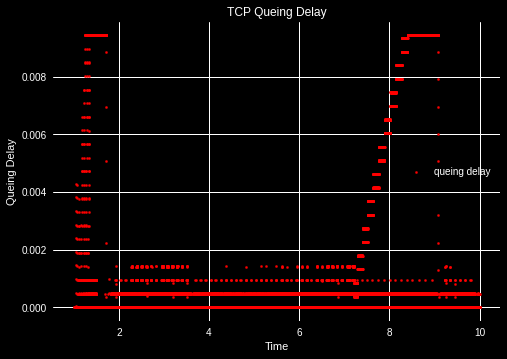

In [6]:
startTime = []
endTime = []
item = {}
seqDelay = []
seqEnd = []
with open('tcp-example.tr', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line[0] == '+':
            timeStart = line.find('+ ') + 2
            timeEnd = line.find(' ', timeStart)
            time = float(line[timeStart:timeEnd])
            startTime.append(time)
            seqNoStart = line.find('Seq=') + 4
            seqNoEnd = line.find(' ', seqNoStart)
            seqNo = line[seqNoStart:seqNoEnd]
            item[seqNo] = time
        elif line[0] == '-':
            timeStart = line.find('- ') + 2
            timeEnd = line.find(' ', timeStart)
            time = float(line[timeStart:timeEnd])
            endTime.append(time)
            seqNoStart = line.find('Seq=') + 4
            seqNoEnd = line.find(' ', seqNoStart)
            seqNo = line[seqNoStart:seqNoEnd]
            seqDelay.append(time - item[seqNo])
            seqEnd.append(time)
            item.pop(seqNo)

qtime = np.array(endTime) - np.array(startTime)
# plt.plot(endTime, qtime, 'r', label='queing delay')
# plt.plot(endTime, seqDelay, 'r', label='queing delay')
plt.scatter(endTime, seqDelay, s=20, label='queing delay', color='r', marker='.')
plt.xlabel('Time')
plt.ylabel('Queing Delay')
plt.title('TCP Queing Delay')
plt.legend()
plt.show()